# 音声分析
時系列データの一つとして音響データがある。しかし、音響データは統計的な時系列データと異なりデータ数が非常に多く、統計的な時系列データの分析手法と異なる方法が有効になる。また、分析手法を使用することで特徴量を得ることができるため、後に機械学習など数理モデルを作った際にもデータセットとして使用できる。

ここでは、代表的な音響データの分析として「FFT」「STFT」「MFCC」「ZCR」を使用する。

## ライブラリのインポート

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display as display

## データの読み込み

In [2]:
y, sr = librosa.load("riyoukiyaku01kawamoto.mp3")

C:\Users\decar\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


### サンプリングレート

In [3]:
sr

22050

### 音響データをグラフで出力

In [4]:
x = np.linspace(0, len(y)/sr, len(y))

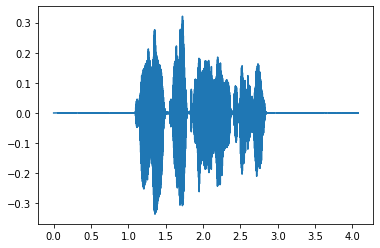

In [5]:
plt.plot(x, y)
plt.show()

## 無音区間の削除

In [6]:
D = librosa.stft(y)
S, phase = librosa.magphase(D)
Sdb = librosa.amplitude_to_db(S)

In [7]:
interval = librosa.effects.split(y, top_db=max(Sdb.ravel())*1.5)#係数についてはデータによって値を調節する必要がある。
interval

array([[23040, 64000]])

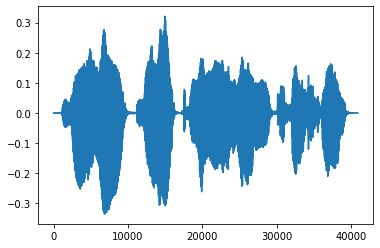

In [8]:
for i in range(len(interval)):
    plt.plot(y[interval[i][0]:interval[i][1]])
    plt.show()

In [9]:
tmp = []
for i in range(len(interval)):
    tmp.append(y[interval[i][0]:interval[i][1]])
y = np.array(tmp).flatten()
x = np.linspace(0, len(y)/sr, len(y))

## FFT
使用される音響データの中で周波数成分の強さを数値化する。

In [10]:
F = np.fft.fft(y)
amp = np.abs(F)

In [11]:
freq = np.fft.fftfreq(amp.shape[0], d=1.0/sr)

In [12]:
freq

array([ 0.        ,  0.53833008,  1.07666016, ..., -1.61499023,
       -1.07666016, -0.53833008])

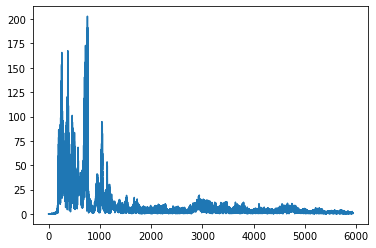

In [13]:
plt.plot(freq[:int(sr/2)], amp[:int(sr/2)])
plt.show()

## STFT
短時間で音響データを区切って時系列データとして周波数成分の強さを分析する。ここではデータについて分かりやすくするため読み込んだ音響の時系列データと一緒にSTFTの時系列データを出力する。

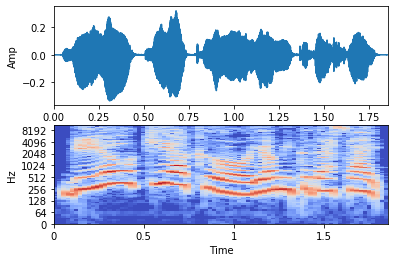

In [14]:
D = librosa.stft(y)
S, phase = librosa.magphase(D)
Sdb = librosa.amplitude_to_db(S)
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("Amp")
plt.xlim(min(x), max(x))
plt.subplot(2, 1, 2)
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.xlim(min(x), max(x))
plt.show()

時系列ごとの周波数成分を確認できる。このデータについてカラーバーと共に出力する。

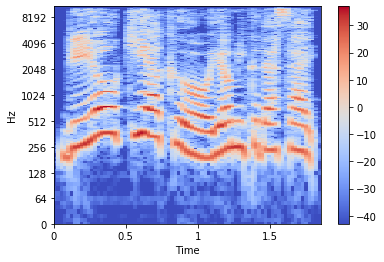

In [15]:
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.xlim(min(x), max(x))
plt.show()

ここでは無音区間を削除しているため時間ごとの周波数成分を特徴量として学習させる、あるいは時間ごとの特徴量を予測に使い、全ての予測結果の最頻値を使うなどして精度の向上を行う。

## MFCC
音響について、人間が理解しやすい形に変換したものになる。

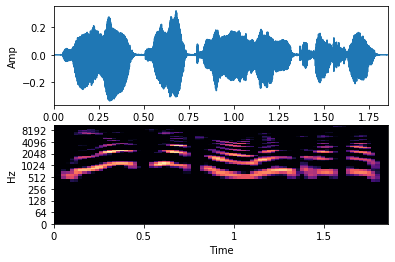

In [16]:
S = librosa.feature.melspectrogram(y, sr=sr)
Sdb = librosa.amplitude_to_db(S, ref=np.max)
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("Amp")
plt.xlim(min(x), max(x))
plt.subplot(2, 1, 2)
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.xlim(min(x), max(x))
plt.show()

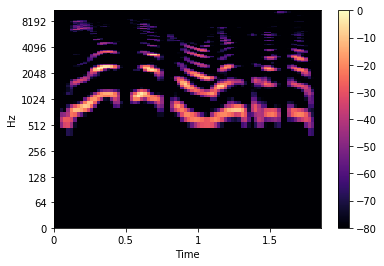

In [17]:
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.xlim(min(x), max(x))
plt.show()

ここでは無音区間を削除しているため時間ごとのMFCCを特徴量として学習させる、あるいは時間ごとの特徴量を予測に使い、全ての予測結果の最頻値を使うなどして精度の向上を行う。

## ZCR
波形データが0を境に上下した回数を使用する。ここでは無音区間を考慮して1秒から3秒で算出する。ただし、サンプリングレートに注意すること。

In [18]:
zc = librosa.zero_crossings(y, pad=False)
zc_bin = np.where(zc==True, 1, 0)
sum(zc_bin)/len(zc_bin)

0.1185791015625